In [73]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [57]:
iris_dataset = sns.load_dataset("iris")
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


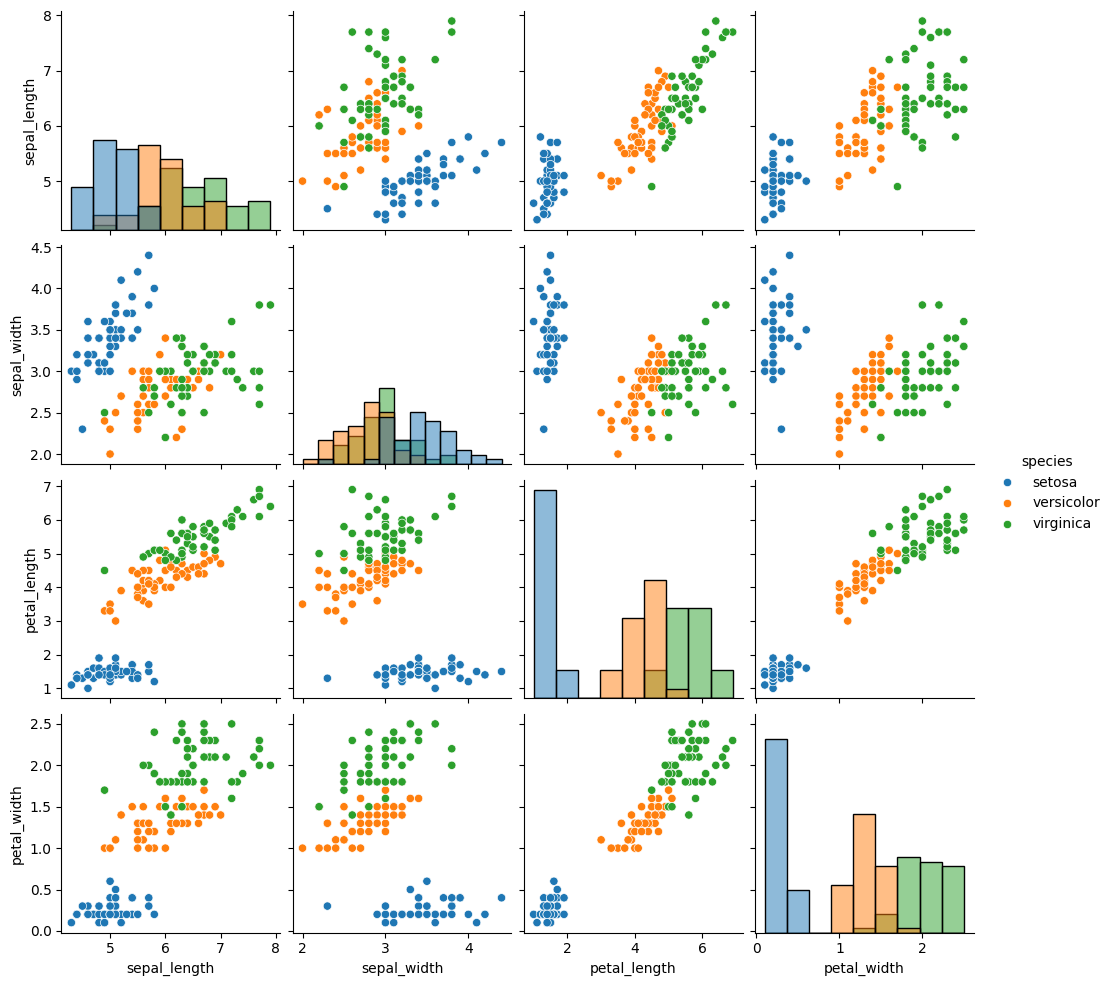

In [58]:
sns.pairplot(iris_dataset, hue="species", diag_kind="hist")

In [59]:
y = iris_dataset.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [60]:

X = iris_dataset.drop("species", axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
model = LogisticRegression(penalty="l2", C=1e5)
model.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [63]:
predictions = model.predict(X_test)
predictions[:5]

array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica'],
      dtype=object)

In [64]:
correct_values = 0
for i, value in enumerate(y_test):
    if y_test.iloc[i] == predictions[i]:
        correct_values += 1

In [65]:
correct_values, len(y_test)

(45, 45)

In [66]:
accuracy_score(predictions, y_test)

1.0

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
knn_predictions = knn_model.predict(X_test)
knn_predictions[:5], y_test[:5]

(array(['versicolor', 'virginica', 'virginica', 'setosa', 'virginica'],
       dtype=object),
 79     versicolor
 121     virginica
 140     virginica
 22         setosa
 114     virginica
 Name: species, dtype: object)

In [69]:
correct_predictions = 0

for i, species in enumerate(knn_predictions):
    if species == y_test.iloc[i]:
        correct_predictions += 1
    

In [70]:
correct_predictions, len(y_test)

(44, 45)

Different Ways of Computing Accuracy Score

In [79]:
accuracy = accuracy_score(knn_predictions, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.98


In [81]:
print("Accuracy: {:.2f}".format(np.mean(knn_predictions == y_test)))

Accuracy: 0.98


In [82]:
print("Accuracy: {:.2f}".format(knn_model.score(X_test, y_test)))

Accuracy: 0.98
